# Libraries, Exploring the Data, Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('./dataset.csv')
df.shape

(4424, 35)

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.isna().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df['Curricular units 1st sem (evaluations)'].value_counts()

,count
Curricular units 1st sem (evaluations),
8,791
7,703
6,598
9,402
0,349
10,340
11,239
12,223
5,220


In [ ]:
df['Curricular units 1st sem (grade)'].value_counts()

,count
Curricular units 1st sem (grade),
0.000000,718
12.000000,205
13.000000,147
11.000000,138
11.500000,89
...,...
12.855556,1
13.040000,1
15.657143,1


In [ ]:
df['Curricular units 1st sem (grade)'].describe(),  df['Curricular units 2nd sem (grade)'].describe()
# summary statistics for "grade" for each semester

(count    4424.000000
 mean       10.640822
 std         4.843663
 min         0.000000
 25%        11.000000
 50%        12.285714
 75%        13.400000
 max        18.875000
 Name: Curricular units 1st sem (grade), dtype: float64,
 count    4424.000000
 mean       10.230206
 std         5.210808
 min         0.000000
 25%        10.750000
 50%        12.200000
 75%        13.333333
 max        18.571429
 Name: Curricular units 2nd sem (grade), dtype: float64)

# Feature Engineering

Let's add a GPA column to our dataframe, and see how it looks

In [ ]:
GPA_1 = df['Curricular units 1st sem (grade)']/df['Curricular units 1st sem (enrolled)']
GPA_2 = df['Curricular units 2nd sem (grade)']/df['Curricular units 2nd sem (enrolled)']
df['GPA_1'] = GPA_1
df['GPA_2'] = GPA_2
#df = pd.concat([df['GPA_1'], df['GPA_2']], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df['GPA_1'].describe(), df['GPA_2'].describe()
# comparing summary stats for 1st & 2nd-semester GPA (our derived column)

(count    4244.000000
 mean        1.770686
 std         0.807751
 min         0.000000
 25%         1.665789
 50%         2.000000
 75%         2.238571
 max         8.000000
 Name: GPA_1, dtype: float64,
 count    4244.000000
 mean        1.693522
 std         0.875114
 min         0.000000
 25%         1.527778
 50%         1.924682
 75%         2.233333
 max        12.500000
 Name: GPA_2, dtype: float64)

# New Discovery -- data might not be clean enough?

In [ ]:
df_enrolled = df[df['Target']=='Enrolled']
df_graduate = df[df['Target']=='Graduate']
df_dropout = df[df['Target']=='Dropout']
# subsetting our df by each of the three targets

In [ ]:
df_graduate['GPA_1'].describe(), df_graduate['GPA_2'].describe()
# somehow we have a min of 0 in our graduates df.  Interesting.

(count    2134.000000
 mean        2.028974
 std         0.480365
 min         0.000000
 25%         1.816486
 50%         2.055556
 75%         2.305556
 max         8.000000
 Name: GPA_1, dtype: float64,
 count    2134.000000
 mean        2.020506
 std         0.436453
 min         0.586957
 25%         1.763398
 50%         2.039456
 75%         2.300000
 max         3.875000
 Name: GPA_2, dtype: float64)

In [ ]:
df_dropout['GPA_1'].describe(), df_dropout['GPA_2'].describe()

(count    1344.000000
 mean        1.265074
 std         1.044929
 min         0.000000
 25%         0.000000
 50%         1.750000
 75%         2.083333
 max         6.250000
 Name: GPA_1, dtype: float64,
 count    1344.000000
 mean        1.033990
 std         1.126700
 min         0.000000
 25%         0.000000
 50%         0.940609
 75%         2.000000
 max        12.500000
 Name: GPA_2, dtype: float64)

In [ ]:
sum(df_graduate['GPA_1'] == 0.00), sum(df_graduate['GPA_2'] == 0.00)
# this is a bit deceiving
# our GPA metric divides "grade" by the number of enrolled credits
# but we have 70-some students who got a 0 grade in semester 1 and semester 2.
# But they also enrolled in 0 credits!  can't divide by 0 !!!


(2, 0)

In [ ]:
df_graduate.loc[df_graduate['Curricular units 1st sem (grade)'] == 0.00, 'Curricular units 1st sem (enrolled)'].value_counts()
# so 2 students actually enrolled in credit classes and still had a GPA of 0
# but 75 students had a grade of 0 without having enrolled in any classes.  This could be an error.
# we could reclassify them as 'dropout'.  But we could also just delete them entirely.  They never showed up?

,count
Curricular units 1st sem (enrolled),
0,75
5,2


In [ ]:
df_graduate.loc[df_graduate['Curricular units 2nd sem (grade)'] == 0.00, 'Curricular units 2nd sem (enrolled)'].value_counts()

,count
Curricular units 2nd sem (enrolled),
0,75


In [ ]:
df_graduate.loc[df_graduate['Curricular units 1st sem (grade)'] == 0.00].shape, df_graduate.loc[df_graduate['Curricular units 2nd sem (grade)'] == 0.00].shape

((77, 37), (75, 37))

In [ ]:
df_sem_1_grade_zero=df_graduate.loc[df_graduate['Curricular units 1st sem (grade)']==0.00]
g1_zeros = df_sem_1_grade_zero.index.tolist()
df_sem_2_grade_zero=df_graduate.loc[df_graduate['Curricular units 2nd sem (grade)']==0.00]
g2_zeros = df_sem_2_grade_zero.index.tolist()

In [ ]:
len(g1_zeros), len(g2_zeros)

(77, 75)

the above means there are possible differences in which students got zeroes for the first semester, versus the second semester.

In [ ]:
for i in g2_zeros:
    if i not in g1_zeros:
        print(i)

There are no such students -- all the students who got zeros in semester 2 also got zeros in semester 1.  This is an argument for re-labelling those 75 students as 'dropout'.

In [ ]:
for i in g1_zeros:
    if i not in g2_zeros:
        print(i)

1686
3747


This means there are exactly two students who got zeroes in semester one and then got a non-zero grade in semester 2.  Bully for them!  Let's see just those 2 students...

In [ ]:
df.loc[[1686, 3747]]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,GPA_1,GPA_2
1686,1,8,3,6,1,1,1,23,1,10,...,10,5,12.285714,1,10.8,1.4,1.74,Graduate,0.0,2.457143
3747,1,14,1,8,1,1,1,24,3,4,...,6,4,13.750000,1,10.8,1.4,1.74,Graduate,0.0,2.750000


In [ ]:
curricular_units_cols = [col for col in df.columns if 'Curricular' in col]
curricular_units_cols, len(curricular_units_cols)
additional_cols = ['Debtor', 'Displaced', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment']
curricular_units_cols.extend(additional_cols)
curricular_units_cols

['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Debtor',
 'Displaced',
 'Tuition fees up to date',
 'Scholarship holder',
 'Age at enrollment']

In [ ]:
df.loc[[1686, 3747], curricular_units_cols]

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Debtor,Displaced,Tuition fees up to date,Scholarship holder,Age at enrollment
1686,0,5,11,0,0.0,0,0,5,10,5,12.285714,1,0,1,1,0,21
3747,0,5,6,0,0.0,5,0,5,6,4,13.750000,1,0,1,1,0,21


# Creating a credits metric

In [ ]:
sum(df['Curricular units 1st sem (approved)'] < df['Curricular units 1st sem (enrolled)']), sum(df['Curricular units 2nd sem (approved)'] < df['Curricular units 2nd sem (enrolled)'])
# how many students took more credits than they were approved for in semester 1, semester 2
# this looks like a decent feature
# we might also look to scale it.

(2516, 2655)

In [ ]:
df['credits_over_under_sem_1'] = df['Curricular units 1st sem (approved)'] - df['Curricular units 1st sem (enrolled)']
df['credits_over_under_sem_2'] = df['Curricular units 2nd sem (approved)'] - df['Curricular units 2nd sem (enrolled)']
df['credits_over_under_sem_1'].describe(), df['credits_over_under_sem_2'].describe()

(count    4424.000000
 mean       -1.563969
 std         1.980227
 min        -9.000000
 25%        -2.000000
 50%        -1.000000
 75%         0.000000
 max         0.000000
 Name: credits_over_under_sem_1, dtype: float64,
 count    4424.000000
 mean       -1.796338
 std         2.144640
 min        -9.000000
 25%        -3.000000
 50%        -1.000000
 75%         0.000000
 max         0.000000
 Name: credits_over_under_sem_2, dtype: float64)

# Creating a grade improvement feature

In [ ]:
df['GPA_difference'] = df['GPA_1'] - df['GPA_2']
df['GPA_difference'].describe()
# the 75 people who have no GPA because of the zero-division issue don't show up here
# so we'll get NaN's in GPA_1, GPA_2, and GPA_difference.  Gotta fix that.

,GPA_difference
count,4244.000000
mean,0.077164
std,0.581635
min,-9.031250
25%,-0.083333
50%,0.000000
75%,0.138889
max,6.250000


# Taking care of NaN's that my feature engineering introduced

In [ ]:
df.loc[df['Curricular units 1st sem (enrolled)']==0]['GPA_1'].fillna(0, inplace=True)
df.loc[df['Curricular units 2nd sem (enrolled)']==0]['GPA_2'].fillna(0, inplace=True)
# still need to understand why this doesn't work

<ipython-input-25-d00d5e6a3178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Curricular units 1st sem (enrolled)']==0]['GPA_1'].fillna(0, inplace=True)
<ipython-input-25-d00d5e6a3178>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Curricular units 2nd sem (enrolled)']==0]['GPA_2'].fillna(0, inplace=True)


In [ ]:
df['GPA_1'].fillna(0, inplace=True)
df['GPA_2'].fillna(0, inplace=True)
df['GPA_difference'].fillna(0, inplace=True)
# NaN issues fixed

In [ ]:
df.isna().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


# One Last Check

In [ ]:
sum(df['Curricular units 1st sem (credited)'] > df['Curricular units 1st sem (enrolled)']), sum(df['Curricular units 2nd sem (credited)'] > df['Curricular units 2nd sem (enrolled)'])
# nobody in the dataset received more credits than they were enrolled for in either semester.  Just checking.

(0, 0)

In [ ]:
df_dropout['Tuition fees up to date'].value_counts()

,count
Tuition fees up to date,
1,964
0,457


Outcomes (Target):

In [ ]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


Marital Status Codes:

1.   Single
2.   Married
3.   Widowed
4.   Divorced
5.   De-facto union
6.   Legally separated


In [ ]:
df["Father's occupation"].value_counts()

,count
Father's occupation,
10,1010
8,666
6,516
5,386
4,384
9,318
11,266
7,242
3,197


In [ ]:
df['Course'].value_counts()

,count
Course,
12,766
9,380
10,355
6,337
15,331
14,268
17,268
11,252
5,226


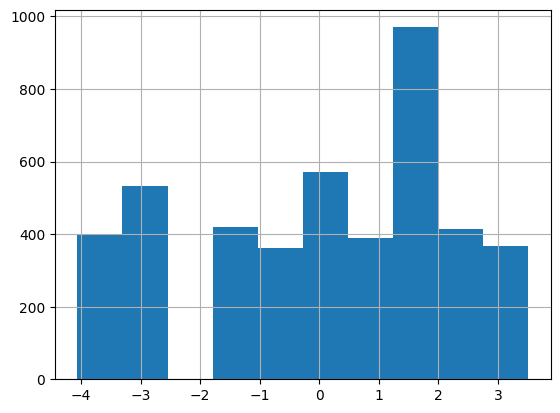

In [ ]:
hist = df['GDP'].hist()

In [ ]:
len(g2_zeros)

75

In [ ]:
df.loc[g2_zeros, 'Target'] = 'Dropout'

In [ ]:
df_graduate['Curricular units 2nd sem (grade)'].describe()

,Curricular units 2nd sem (grade)
count,2134.000000
mean,13.143525
std,1.264142
min,10.000000
25%,12.200000
50%,13.000000
75%,14.000000
max,18.571429


In [ ]:
df_graduate=df[df['Target']=='Graduate']
df_dropout=df[df['Target']=='Dropout']

df_graduate['Curricular units 1st sem (grade)'].describe()

,Curricular units 1st sem (grade)
count,2134.000000
mean,13.088019
std,1.312369
min,0.000000
25%,12.200000
50%,13.017768
75%,13.875000
max,18.875000


Macroeconomic columns:

Unemployment rate, Inflation rate, and GDP are all columns.  Since these aren't the product of one-hot encoding, they demand a bit of attention (outliers or data entry errors seem more likely).  They look fine.

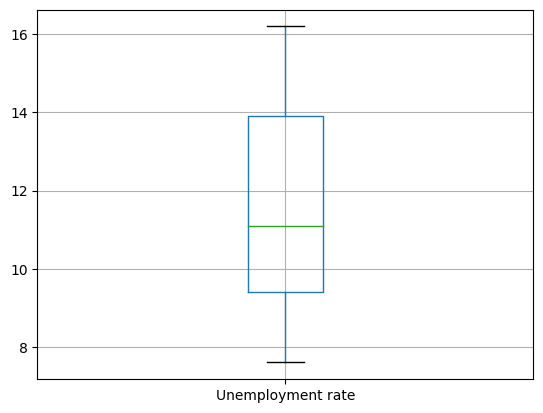

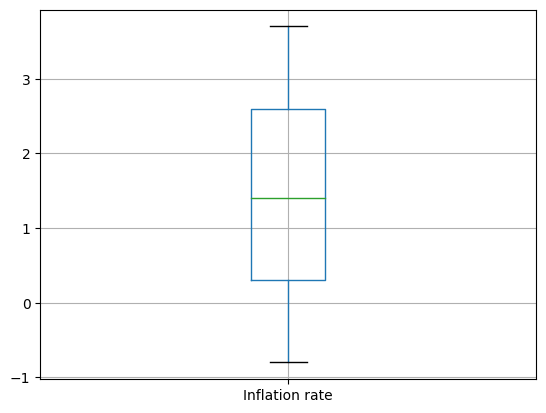

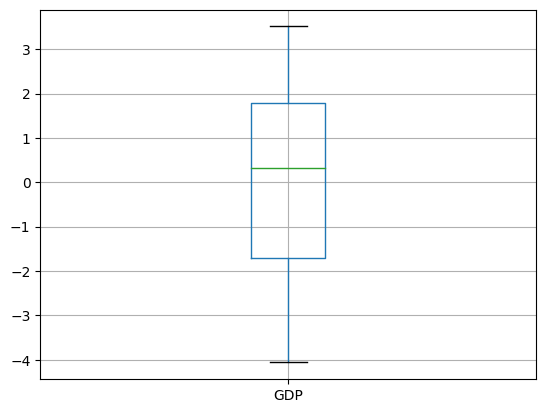

In [ ]:
macroeconomic = ['Unemployment rate', 'Inflation rate', 'GDP']
for col in macroeconomic:
    boxplot = df.boxplot(column=[col])
    plt.show()

# Splitting the data (original dataset)

We'll use train_test_split with the stratification set to the target's 3 levels (graduated, dropped out, enrolled)

In [ ]:
features = df.drop('Target', axis=1)
target = df['Target']

In [ ]:
features.shape

(4424, 39)

In [ ]:
features = StandardScaler().fit_transform(features)

In [ ]:
features.shape

(4424, 39)

In [ ]:
np.mean(features), np.std(features)

(1.997341000392084e-18, 1.0)

In [ ]:
features_normalized = pd.DataFrame(features, columns=df.drop('Target', axis=1).columns)

In [ ]:
features_normalized.shape

(4424, 39)

In [ ]:
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(features_normalized, target, stratify=target, test_size=.2, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=.2, random_state=0)

# PCA Decomposition

In [ ]:
from sklearn.decomposition import PCA
for n in range(1,33):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(features_normalized)
    print('Explained variance for ' + str(n) + ' component(s):{}\n'.format(pca.explained_variance_ratio_))
    print('Lost information: {}'.format(1-sum(pca.explained_variance_ratio_)))
    print('**************')

Explained variance for 1 component(s):[0.18125802]

Lost information: 0.8187419761261321
**************
Explained variance for 2 component(s):[0.18125802 0.12185465]

Lost information: 0.696887321666345
**************
Explained variance for 3 component(s):[0.18125802 0.12185465 0.06414592]

Lost information: 0.6327414041468695
**************
Explained variance for 4 component(s):[0.18125802 0.12185461 0.06414123 0.05124118]

Lost information: 0.5815049618177941
**************
Explained variance for 5 component(s):[0.18125802 0.12185463 0.06406925 0.05117884 0.05001511]

Lost information: 0.5316241585404724
**************
Explained variance for 6 component(s):[0.18125802 0.12185465 0.06414255 0.05130434 0.05017151 0.04551706]

Lost information: 0.4857518549646638
**************
Explained variance for 7 component(s):[0.18125802 0.12185463 0.06414106 0.05131501 0.05015508 0.04551924
 0.03924825]

Lost information: 0.4465086974171779
**************
Explained variance for 8 component(s):[0.

In [ ]:
from sklearn.decomposition import PCA
number_components = 24
pca = PCA(n_components=number_components)
principalComponents = pca.fit_transform(features_normalized)
pca_df = pd.DataFrame(data=principalComponents, columns=['pc'+str(i) for i in range(1,number_components+1)])

In [ ]:
pca_df.tail()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
4419,0.632820,-1.714085,1.685257,-0.388517,-1.195236,0.599616,0.366836,-1.140311,-1.063204,2.191413,...,1.903191,0.617515,1.776952,-0.096109,-0.153559,1.975528,-0.453716,0.529846,0.598901,0.152324
4420,-0.653418,-1.149509,1.566869,11.728531,2.832791,-0.053495,0.793989,-2.270197,0.358819,-0.109336,...,0.645684,0.262928,0.011983,-0.659133,-0.381682,-0.713821,-0.069837,-0.416090,0.629907,0.544608
4421,0.596653,-0.318357,-0.727348,-0.590084,1.394844,1.389882,-0.326151,-1.100139,-0.868872,-0.664496,...,-0.439797,-1.034846,-0.202524,0.642109,0.358160,-0.899454,0.694166,-1.018907,0.827066,-0.046849
4422,0.803100,-2.547427,-0.720564,-0.761317,0.445508,0.290228,0.900204,-0.055401,-0.828487,-1.802098,...,-0.064448,-1.179014,-0.463209,0.081563,0.175417,-1.045317,-0.573001,0.842820,0.607711,-0.220809
4423,1.010881,-1.345953,-0.341697,6.176925,2.086343,-0.799835,3.527425,-1.757340,-1.230624,0.549444,...,-0.089105,0.585960,0.002466,-0.750090,-1.178950,-0.648810,0.422081,-0.379333,-0.134920,0.365077


In [ ]:
print('Explained variance: {}'.format(pca.explained_variance_ratio_))

Explained variance: [0.18125802 0.12185465 0.06414601 0.05131783 0.05017938 0.04552591
 0.03927865 0.03805917 0.03577411 0.03010577 0.02880566 0.02724006
 0.02595422 0.02542725 0.02319056 0.02292215 0.02089276 0.01956203
 0.01732401 0.01594182 0.01465217 0.0139469  0.01304981 0.01248192]


In [ ]:
type(pca.explained_variance_ratio_)

numpy.ndarray

In [ ]:
pca.explained_variance_ratio_.sum()

0.9388908244181271

# Splitting the Data (PCA)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, target, stratify=target, test_size=.2, random_state=0)

In [ ]:
pca_df.shape

(4424, 24)

The 80/20 split we desired is borne out by the numbers below...

In [ ]:
X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((3539, 24), (885, 24), (3539,), (885,))

In [ ]:
df['Target'].value_counts()/df.shape[0]

,count
Target,
Graduate,0.482369
Dropout,0.338156
Enrolled,0.179476


... and the relative target level percentages have been maintained in the training and testing sets

(I used the PCA dataset to illustrate that we kept the right percentages of each Target class -- it will be true in the original and normalized datasets, as well)

In [ ]:
print('Training relative %ages:\n', y_train_pca.value_counts()/y_train_pca.shape[0],'\n\n', 'Testing relative %ages:\n', y_test_pca.value_counts()/y_test_pca.shape[0])

Training relative %ages:
 Target
Graduate    0.482340
Dropout     0.338231
Enrolled    0.179429
Name: count, dtype: float64 

 Testing relative %ages:
 Target
Graduate    0.482486
Dropout     0.337853
Enrolled    0.179661
Name: count, dtype: float64


# K-nearest Neighbors Model (KNN)




Baseline model, using our NORMALIZED (original) dataset

In [ ]:
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_normalized, y_train_normalized)

y_train_pred = knn_model.predict(X_train_normalized)
y_test_pred = knn_model.predict(X_test_normalized)

print(f"Train acc: {round(accuracy_score(y_train_normalized, y_train_pred), 3)}")
print(f"Test acc:  {round(accuracy_score(y_test_normalized, y_test_pred), 3)}")


Train acc: 0.817
Test acc:  0.755


... and now to tune for the proper number of neighbors (optimal k)

In [ ]:
train_acc = []
test_acc = []

for k in range(15, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_normalized, y_train_normalized)

    y_train_pred = knn_model.predict(X_train_normalized)
    y_test_pred = knn_model.predict(X_test_normalized)


    print(f"K : {k}")
    print(f"Train acc: {round(accuracy_score(y_train_normalized, y_train_pred), 3)}")
    print(f"Test acc:  {round(accuracy_score(y_test_normalized, y_test_pred), 3)}")
    print("="*50)

    train_acc.append(accuracy_score(y_train_normalized, y_train_pred))
    test_acc.append(accuracy_score(y_test_normalized, y_test_pred))

K : 15
Train acc: 0.766
Test acc:  0.767
K : 16
Train acc: 0.767
Test acc:  0.767
K : 17
Train acc: 0.763
Test acc:  0.764
K : 18
Train acc: 0.761
Test acc:  0.764
K : 19
Train acc: 0.76
Test acc:  0.759
K : 20
Train acc: 0.757
Test acc:  0.756
K : 21
Train acc: 0.758
Test acc:  0.763
K : 22
Train acc: 0.754
Test acc:  0.759
K : 23
Train acc: 0.757
Test acc:  0.757
K : 24
Train acc: 0.753
Test acc:  0.756
K : 25
Train acc: 0.754
Test acc:  0.762
K : 26
Train acc: 0.752
Test acc:  0.763
K : 27
Train acc: 0.75
Test acc:  0.758
K : 28
Train acc: 0.749
Test acc:  0.754
K : 29
Train acc: 0.747
Test acc:  0.753


seems like k=20 to k=22 might be warranted

1.   List item
2.   List item



and now KNN baseline and tuning on our PCA dataset

In [ ]:
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train_pca)

y_train_pred = knn_model.predict(X_train_pca)
y_test_pred = knn_model.predict(X_test_pca)

print(f"Train acc: {round(accuracy_score(y_train_pca, y_train_pred), 3)}")
print(f"Test acc:  {round(accuracy_score(y_test_pca, y_test_pred), 3)}")


Train acc: 0.815
Test acc:  0.757


In [ ]:
train_acc = []
test_acc = []

for k in range(15, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_pca, y_train_pca)

    y_train_pred = knn_model.predict(X_train_pca)
    y_test_pred = knn_model.predict(X_test_pca)


    print(f"K : {k}")
    print(f"Train acc: {round(accuracy_score(y_train_pca, y_train_pred), 3)}")
    print(f"Test acc:  {round(accuracy_score(y_test_pca, y_test_pred), 3)}")
    print("="*50)

    train_acc.append(accuracy_score(y_train_pca, y_train_pred))
    test_acc.append(accuracy_score(y_test_pca, y_test_pred))

K : 15
Train acc: 0.767
Test acc:  0.773
K : 16
Train acc: 0.765
Test acc:  0.775
K : 17
Train acc: 0.767
Test acc:  0.773
K : 18
Train acc: 0.765
Test acc:  0.771
K : 19
Train acc: 0.763
Test acc:  0.774
K : 20
Train acc: 0.758
Test acc:  0.771
K : 21
Train acc: 0.759
Test acc:  0.765
K : 22
Train acc: 0.762
Test acc:  0.767
K : 23
Train acc: 0.757
Test acc:  0.769
K : 24
Train acc: 0.756
Test acc:  0.771
K : 25
Train acc: 0.753
Test acc:  0.768
K : 26
Train acc: 0.754
Test acc:  0.764
K : 27
Train acc: 0.754
Test acc:  0.763
K : 28
Train acc: 0.752
Test acc:  0.764
K : 29
Train acc: 0.751
Test acc:  0.763


It seems like k=22 neighbors might do

what to try next?  Decision Tree?  SVM?  Random Forest?

# Decision Tree Model

first, on our original dataset...

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)}")

Training Accuracy: 1.0
Testing Accuracy: 0.7084745762711865


In [ ]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

for k in range(1,12):
    model = DecisionTreeClassifier(max_depth=k, criterion='entropy')
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print(f"K: {k}")
    print(f"Training Accuracy: {accuracy_score(y_train, train_pred)}")
    print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)}")
    print("="*50)

K: 1
Training Accuracy: 0.7247810115851936
Testing Accuracy: 0.7468926553672316
K: 2
Training Accuracy: 0.7247810115851936
Testing Accuracy: 0.7468926553672316
K: 3
Training Accuracy: 0.7374964679287934
Testing Accuracy: 0.7559322033898305
K: 4
Training Accuracy: 0.7654704718847132
Testing Accuracy: 0.7796610169491526
K: 5
Training Accuracy: 0.7821418479796552
Testing Accuracy: 0.7875706214689265
K: 6
Training Accuracy: 0.7920316473580108
Testing Accuracy: 0.7887005649717514
K: 7
Training Accuracy: 0.8089855891494773
Testing Accuracy: 0.7853107344632768
K: 8
Training Accuracy: 0.8262220966374683
Testing Accuracy: 0.784180790960452
K: 9
Training Accuracy: 0.8468493924837525
Testing Accuracy: 0.7638418079096045
K: 10
Training Accuracy: 0.8739756993500989
Testing Accuracy: 0.7649717514124293
K: 11
Training Accuracy: 0.8968635207685787
Testing Accuracy: 0.7536723163841808


Seems like we'd want a depth of n=5 for our original dataset

Now, let's run a decision tree model on our PCA dataset...



In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train_pca)

train_pred = model.predict(X_train_pca)
test_pred = model.predict(X_test_pca)

print(f"Training Accuracy: {accuracy_score(y_train_pca, train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test_pca, test_pred)}")

Training Accuracy: 1.0
Testing Accuracy: 0.6768361581920904


Now tune for the right depth

In [ ]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(X_train_pca, y_train_pca)

train_pred = model.predict(X_train_pca)
test_pred = model.predict(X_test_pca)

for k in range(1,12):
    model = DecisionTreeClassifier(max_depth=k, criterion='entropy')
    model.fit(X_train_pca, y_train_pca)

    train_pred = model.predict(X_train_pca)
    test_pred = model.predict(X_test_pca)
    print(f"K: {k}")
    print(f"Training Accuracy: {accuracy_score(y_train_pca, train_pred)}")
    print(f"Testing Accuracy: {accuracy_score(y_test_pca, test_pred)}")
    print("="*50)

K: 1
Training Accuracy: 0.7259112743712913
Testing Accuracy: 0.7435028248587571
K: 2
Training Accuracy: 0.7259112743712913
Testing Accuracy: 0.7435028248587571
K: 3
Training Accuracy: 0.7420175190731845
Testing Accuracy: 0.7672316384180791
K: 4
Training Accuracy: 0.7516247527550155
Testing Accuracy: 0.7661016949152543
K: 5
Training Accuracy: 0.7685786945464821
Testing Accuracy: 0.7661016949152543
K: 6
Training Accuracy: 0.785815202034473
Testing Accuracy: 0.7412429378531074
K: 7
Training Accuracy: 0.815202034473015
Testing Accuracy: 0.7457627118644068
K: 8
Training Accuracy: 0.8460016953941791
Testing Accuracy: 0.7220338983050848
K: 9
Training Accuracy: 0.8779316191014411
Testing Accuracy: 0.7220338983050848
K: 10
Training Accuracy: 0.9059056230573609
Testing Accuracy: 0.7096045197740113
K: 11
Training Accuracy: 0.9299237072619384
Testing Accuracy: 0.6971751412429379


seems like we might use n=4 for our depth...

... but notice that the accuracy score has dropped from 76% to 73%.


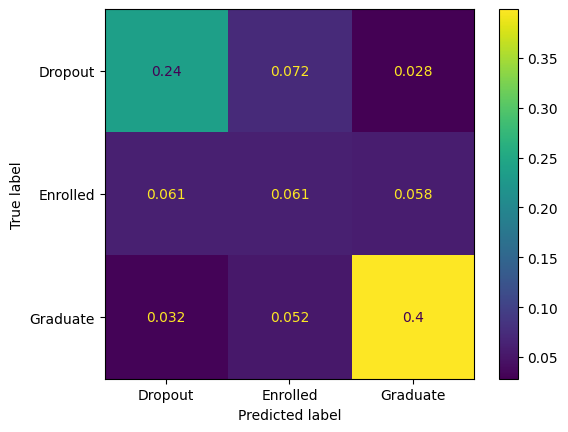

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test_pca, test_pred)/len(y_test_pca)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()


In [ ]:
y_test_pca.value_counts()

,count
Target,
Graduate,427
Dropout,299
Enrolled,159


In [ ]:
print(classification_report(y_test_pca, test_pred))

              precision    recall  f1-score   support

     Dropout       0.72      0.70      0.71       299
    Enrolled       0.33      0.34      0.33       159
    Graduate       0.82      0.83      0.82       427

    accuracy                           0.70       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.70      0.70      0.70       885



# Support Vector Machine (SVM) Model

First, we'll run an SVM model on our normalized (original) dataset

In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:

    svc_model = SVC(kernel=kernel, random_state=42)
    svc_model.fit(X_train_normalized, y_train_normalized)

    train_preds = svc_model.predict(X_train_normalized)
    test_preds = svc_model.predict(X_test_normalized)

    print("*"*50)
    print(f"Kernel: {kernel}")
    print(f"Train Accuracy: {accuracy_score(y_train_normalized, train_preds)}")
    print(f"Test Accuracy: {accuracy_score(y_test_normalized, test_preds)}")


**************************************************
Kernel: linear
Train Accuracy: 0.7846849392483752
Test Accuracy: 0.8135593220338984
**************************************************
Kernel: rbf
Train Accuracy: 0.8310257134783837
Test Accuracy: 0.7988700564971751
**************************************************
Kernel: poly
Train Accuracy: 0.7962701328058773
Test Accuracy: 0.7672316384180791
**************************************************
Kernel: sigmoid
Train Accuracy: 0.6931336535744561
Test Accuracy: 0.7186440677966102


Bit of an improvement here.  Hopeful.

Some parameters to play with, in addition to kernel (see below)

In [ ]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
for kernel in kernels:

    svc_model = SVC(kernel=kernel, random_state=42)
    svc_model.fit(X_train_pca, y_train_pca)

    train_preds = svc_model.predict(X_train_pca)
    test_preds = svc_model.predict(X_test_pca)

    print("*"*50)
    print(f"kernel: {kernel}")
    print(f"Train Accuracy: {accuracy_score(y_train_pca, train_preds)}")
    print(f"Test Accuracy: {accuracy_score(y_test_pca, test_preds)}")

**************************************************
kernel: linear
Train Accuracy: 0.7697089573325798
Test Accuracy: 0.7898305084745763
**************************************************
kernel: rbf
Train Accuracy: 0.8174625600452106
Test Accuracy: 0.7943502824858757
**************************************************
kernel: poly
Train Accuracy: 0.7900536874823396
Test Accuracy: 0.768361581920904
**************************************************
kernel: sigmoid
Train Accuracy: 0.695676744843176
Test Accuracy: 0.6915254237288135


SVM still shows improvement over other models.  The PCA dataset has some information loss, so the slight downtick from the original dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']
            }

grid = GridSearchCV(svm, param_grid, verbose=2)

grid.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.01, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 0.78628507,  0.18062344,  0.46357784,  0.18172789,  0.39319596,
         0.31135674,  0.54918966,  0.18197608,  0.64811673,  0.19828491,
         0.49375858,  0.34205723,  0.34716716,  0.20078001,  0.36365595,
         0.20085387,  0.74864669,  0.69255424,  0.43962164,  0.48893285,
         0.2586628 ,  0.54064512,  0.46497002,  0.48783655,  0.6788137 ,
         3.05927   ,  0.82875504,  3.35283003,  0.27923694,  3.05380173,
         0.25195923,  3.15394273,  0.84100008, 25.07414474,  0.63784595,
        25.14356399,  0.69869647, 24.75615644,  0.29129119, 24.71975012]),
 'std_fit_time': array([0.20089862, 0.00678567, 0.00878268, 0.00532248, 0.00435325,
        0.00789979, 0.11527027, 0.0052191 , 0.00644045, 0.00259977,
        0.10143079, 0.0038634 , 0.07781895, 0.00746985, 0.00750476,
        0.01101269, 0.08349607, 0.14770929, 0.0067342 , 0.0221486 ,
        0.00601568, 0.10939637, 0.00529436, 0.01412062, 0.00843136,
        0.43385323, 0.14405871, 0.3271889

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [ ]:
grid.best_score_

0.769140315968643

In [ ]:
grid_svc_test_preds = grid.predict(X_test_pca)

print(f"Test Accuracy: {accuracy_score(y_test_pca, grid_svc_test_preds)}")

Test Accuracy: 0.7988700564971751


In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

# The verdict

In [ ]:
svc_model_best = SVC(C=100, gamma=.001, kernel='rbf', random_state=42)
svc_model_best.fit(X_train_pca, y_train_pca)

train_preds = svc_model_best.predict(X_train_pca)
test_preds = svc_model_best.predict(X_test_pca)

print(f"Train Accuracy: {accuracy_score(y_train_pca, train_preds)}")
print(f"Test Accuracy: {accuracy_score(y_test_pca, test_preds)}")

Train Accuracy: 0.7914665159649619
Test Accuracy: 0.7988700564971751


# Without PCA...

In [ ]:
svc_model_best = SVC(C=100, gamma=.001, kernel='rbf', random_state=42)
svc_model_best.fit(X_train_normalized, y_train_normalized)

train_preds = svc_model_best.predict(X_train_normalized)
test_preds = svc_model_best.predict(X_test_normalized)

print(f"Train Accuracy: {accuracy_score(y_train_normalized, train_preds)}")
print(f"Test Accuracy: {accuracy_score(y_test_normalized, test_preds)}")

Train Accuracy: 0.807572760666855
Test Accuracy: 0.8169491525423729


# Next Steps:



1.   Try it without the 75
2.   Random Forest model
Random Forest model
3.    any other feature-engineering I can think of

4.   my secret experiment
5.   more visualizations (still a weak point)



# PCA Addenda

A 2D Scatterplot for visualizing 2-components

<Figure size 640x480 with 0 Axes>

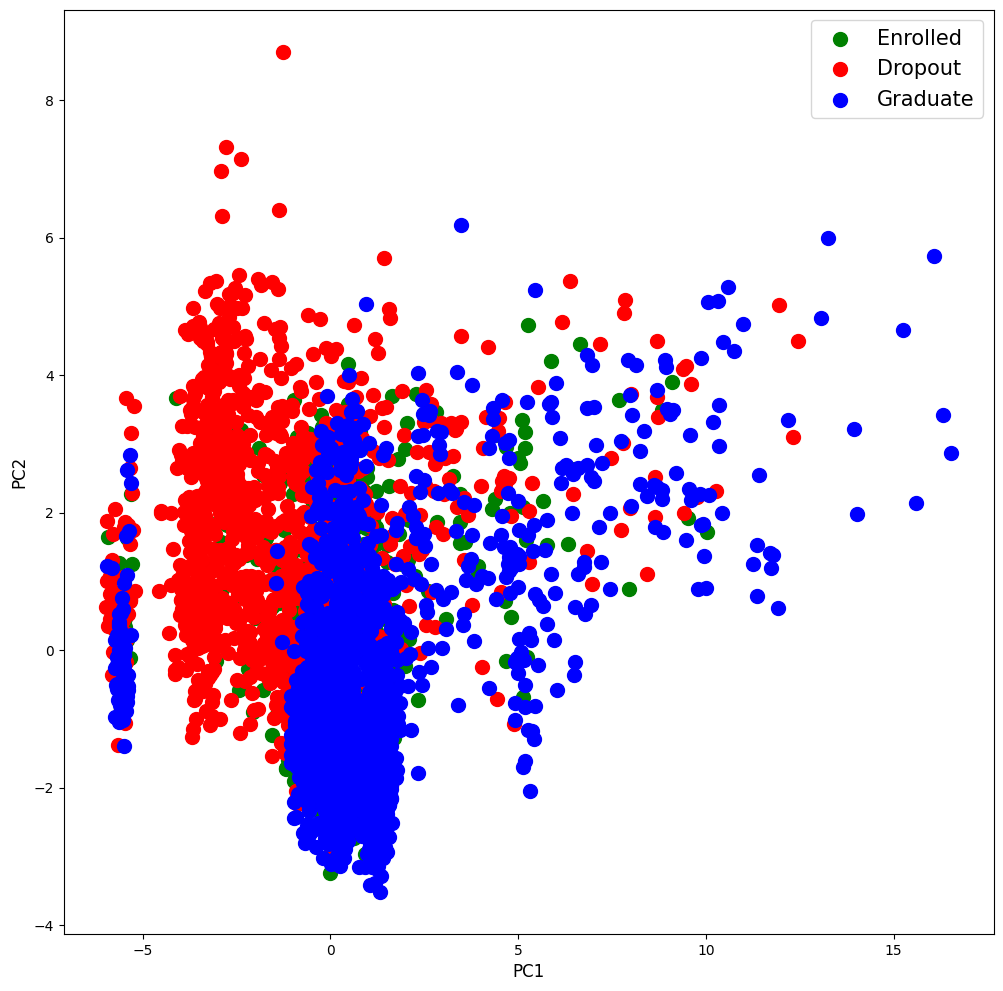

In [ ]:
plt.figure()
plt.figure(figsize=(12,12))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
targets = ['Enrolled', 'Dropout', 'Graduate']
colors = ['g', 'r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df['Target'] == target
    plt.scatter(df2.loc[indicesToKeep, 'pc1'], df2.loc[indicesToKeep, 'pc2'], c=color, s=100)
plt.legend(targets, prop={'size': 15})

In [ ]:
df['Target'].value_counts()


,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794
